<a href="https://colab.research.google.com/github/Ridhichhabra2006/EV_DEMAND_PREDICTION_PROJECT/blob/main/EV_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Electric Vehicle (EV) Adoption Forecasting**
---

Welcome to this notebook **EV Adoption Forecasting**

**Objective:** Predict the number of electric vehicles in upcoming years based on the trends in the data.

**Goal:** Build a regression model that forecasts future EV adoption demand based on historical trends in EV growth, types of vehicles, and regional data.

**Dataset:** This dataset shows the number of vehicles that were registered by Washington State Department of Licensing (DOL) each month. The data is separated by county for passenger vehicles and trucks.

1. Date: Counts of registered vehicles are taken on this day (the end of this month). - 2017-01-31 2024-02-29
2. County: This is the geographic region of a state that a vehicle's owner is listed to reside within. Vehicles registered in Washington.

3. State: This is the geographic region of the country associated with the record. These addresses may be located in other
4. Vehicle Primary Use: This describes the primary intended use of the vehicle.(Passenger-83%, Truck-17%)
5. Battery Electric Vehicles (BEVs): The count of vehicles that are known to be propelled solely by an energy derived from an onboard electric battery.
6. Plug-In Hybrid Electric Vehicles (PHEVs): The count of vehicles that are known to be propelled from energy partially sourced from an onboard electric battery
7. Electric Vehicle (EV) Total: The sum of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs).
8. Non-Electric Vehicle Total: The count of vehicles that are not electric vehicles.
9. Total Vehicles: All powered vehicles registered in the county. This includes electric vehicles.
10. Percent Electric Vehicles: Comparison of electric vehicles versus their non-electric counterparts.



### **Importing Libraries and Loading the Dataset**
---

In [61]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
import kagglehub

path = kagglehub.dataset_download("sahirmaharajj/electric-vehicle-population-size-2024")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/electric-vehicle-population-size-2024


In [62]:
df = pd.read_csv('/kaggle/input/electric-vehicle-population-size-2024/Electric_Vehicle_Population_Size_History_By_County_.csv')
df.head(20)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19
5,May 31 2018,Maui,HI,Passenger,1,0,1,59,60,1.67
6,November 30 2017,Northampton,PA,Passenger,0,1,1,66,67,1.49
7,March 31 2018,Nassau,NY,Passenger,1,0,1,37,38,2.63
8,March 31 2020,DeKalb,IN,Passenger,1,0,1,1,2,50.00
9,January 31 2019,Columbia,WA,Truck,0,0,0,"1,529","1,529",0.00


#### **Getting some Information about the Dataset**

In [63]:
df.shape

(20819, 10)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [65]:
df.describe()

,Percent Electric Vehicles
count,20819.000000
mean,4.139216
std,11.055350
min,0.000000
25%,0.390000
50%,1.220000
75%,2.995000
max,100.000000


### **Data Pre-Processing**
---

In [66]:
# Checking for null values
df.isnull().sum()

,0
Date,0
County,86
State,86
Vehicle Primary Use,0
Battery Electric Vehicles (BEVs),0
Plug-In Hybrid Electric Vehicles (PHEVs),0
Electric Vehicle (EV) Total,0
Non-Electric Vehicle Total,0
Total Vehicles,0
Percent Electric Vehicles,0


In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
# Converts the "Date" column to actual datetime objects
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Removes rows where "Date" conversion failed
df = df[df['Date'].notnull()]

# Removes rows where the target (EV Total) is missing
df = df[df['Electric Vehicle (EV) Total'].notnull()]

# Fill missing values
df['County'] = df['County'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')

# Confirm remaining nulls
print("Missing after fill:")
print(df[['County', 'State']].isnull().sum())

df.head()

Missing after fill:
County    0
State     0
dtype: int64


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,2022-06-30,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [69]:
# Renaming and removing whitespaces from the columns
df.columns = df.columns.str.strip()
df.columns

Index(['Date', 'County', 'State', 'Vehicle Primary Use',
       'Battery Electric Vehicles (BEVs)',
       'Plug-In Hybrid Electric Vehicles (PHEVs)',
       'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
       'Total Vehicles', 'Percent Electric Vehicles'],
      dtype='object')

In [70]:
#Renaming the column for better access
df.rename(columns={'Electric Vehicle (EV) Total': 'EV_Total',
                   'Vehicle Primary Use' : 'Use',
                   'Battery Electric Vehicles (BEVs)' : 'BEVs',
                   'Plug-In Hybrid Electric Vehicles (PHEVs)' : 'PHEVs',
                   'Non-Electric Vehicle Total' : 'Non_EV_Total',
                   'Percent Electric Vehicles' : 'EV_Percent'
                  }, inplace=True)

In [71]:
df.head()

,Date,County,State,Use,BEVs,PHEVs,EV_Total,Non_EV_Total,Total Vehicles,EV_Percent
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,2022-06-30,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19


### **Outlier Detection and Visualization**

---



In [74]:
# Compute Q1 and Q3
Q1 = df['EV_Percent'].quantile(0.25)
Q3 = df['EV_Percent'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('lower_bound:', lower_bound)
print('upper_bound:', upper_bound)

# Identify outliers
outliers = df[(df['EV_Percent'] < lower_bound) | (df['EV_Percent'] > upper_bound)]
print("Number of outliers in 'Percent Electric Vehicles':", outliers.shape[0])

lower_bound: -3.5174999999999996
upper_bound: 6.9025
Number of outliers in 'Percent Electric Vehicles': 2476


In [75]:
# Cap the outliers - it keeps all the data while reducing the skew from extreme values.

df['EV_Percent'] = np.where(df['EV_Percent'] > upper_bound, upper_bound,
                                 np.where(df['EV_Percent'] < lower_bound, lower_bound, df['EV_Percent']))

# Identify outliers
outliers = df[(df['EV_Percent'] < lower_bound) | (df['EV_Percent'] > upper_bound)]
print("Number of outliers in 'Percent Electric Vehicles':", outliers.shape[0])

Number of outliers in 'Percent Electric Vehicles': 0


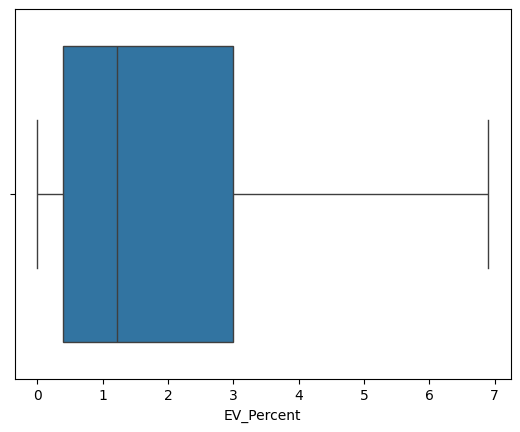

In [76]:
# Visualizing the Outliers
sns.boxplot(x=df['EV_Percent'])
plt.show()

In [ ]:
print("\nCleaned Data Preview")
df.head(10)

### **Extracting Some Features**
---



In [77]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

df.head()

,Date,County,State,Use,BEVs,PHEVs,EV_Total,Non_EV_Total,Total Vehicles,EV_Percent,Year,Month,Quarter
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50,2022,9,3
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57,2022,12,4
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03,2020,1,1
3,2022-06-30,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00,2022,6,2
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19,2021,7,3
